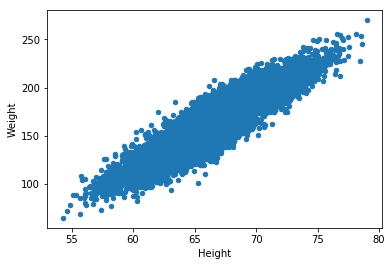

In [12]:
import pandas as pd
import matplotlib
%matplotlib inline
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
df.plot.scatter(x='Height', y='Weight')


In [17]:
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
mask = df.Gender == 'Female'
df[mask]
df.describe()


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


/home/hobs/.virtualenvs/civicu/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d24384080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8d240aa198>]], dtype=object)

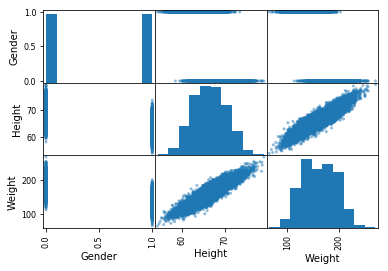

In [18]:
df.Gender = mask.astype(int)
pd.scatter_matrix(df)

In [24]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


In [23]:
df[(df.Height < 60) & (df.Weight < 150)].corr()

,Gender,Height,Weight
Gender,1.000000,-0.080694,-0.179014
Height,-0.080694,1.000000,0.597479
Weight,-0.179014,0.597479,1.000000


In [30]:
(df.Weight * df.Height).sum() ** .5 / (df.Weight * df.Weight).sum() ** .5 / df.Height.dot(df.Height) **.5


9.509708706865971e-05

In [41]:
def predict_weight(height):
    coef = 3
    intercept = 20
    weight = coef * height + intercept
    return weight
    


In [42]:
height = df.Height[1]
print(df.loc[1])
print(predict_weight(df.Height[1]))

Gender      0.000000
Height     68.781904
Weight    162.310473
Name: 1, dtype: float64
226.345712138


In [79]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
X = df.Height.values.reshape(-1, 1)
y = df.Weight
lr = lr.fit(X, y)
df['predicted_weight'] = lr.predict(X)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [80]:
((lr.predict(X) - y) ** 2).mean() ** .5

12.218571272826035

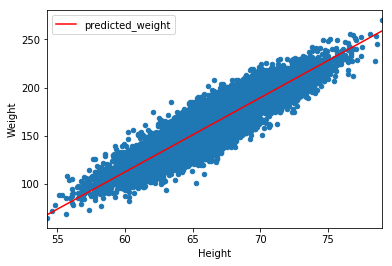

In [83]:
ax = df.plot(kind='scatter', x='Height', y='Weight')
df = df.sort_values('Height')
df.plot(ax=ax, kind='line', x='Height', y='predicted_weight', c='red')

In [ ]:
ax = df.plot(kind='scatter', x='Height', y='Weight')
df = df.sort_values('Height')
df.plot(ax=ax, kind='line', x='Height', y='predicted_weight', c='red')

In [84]:
mask = df['Gender'].astype(bool)
mask

9285     True
6624     True
7294     True
7617     True
5345     True
8692     True
5360     True
6625     True
6176     True
9825     True
6834     True
5732     True
6908     True
8003     True
5740     True
5074     True
8241     True
5123     True
9760     True
5026     True
8853     True
6047     True
6620     True
7586     True
7543     True
5958     True
6982     True
5214     True
6707     True
7324     True
        ...  
3585    False
1568    False
1896    False
4422    False
849     False
673     False
3918    False
2138    False
4400    False
1610    False
4302    False
190     False
3816    False
4701    False
2318    False
2623    False
4331    False
4275    False
3669    False
3909    False
4297    False
912     False
1922    False
2070    False
4569    False
994     False
1317    False
3285    False
3757    False
2014    False
Name: Gender, Length: 10000, dtype: bool

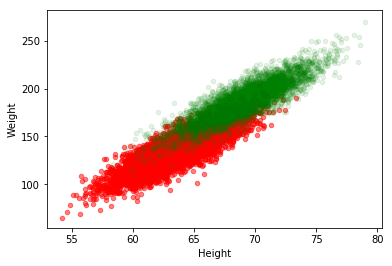

In [101]:
ax = df[mask].plot(kind='scatter', alpha=.5, x='Height', y='Weight', c='red')
df[~mask].plot(ax=ax, alpha=.1, kind='scatter', x='Height', y='Weight', c='green') 

In [107]:
lr_gender = LinearRegression()
lr_gender = lr_gender.fit(df.Height.values.reshape(-1, 1), df.Gender)
df['predicted_gender'] = lr_gender.predict(df.Height.values.reshape(-1, 1))
df['sigmoid_predicted_gender'] = 1. / (1. + pd.np.exp(-df.predicted_gender))
df

,Gender,Height,Weight,predicted_weight,predicted_gender,sigmoid_predicted_gender
9285,1,54.263133,64.700127,68.027016,1.587120,0.830211
6624,1,54.616858,71.393749,70.756810,1.555351,0.825685
7294,1,54.873728,78.606670,72.739147,1.532281,0.822340
7617,1,55.148557,88.812412,74.860088,1.507598,0.818705
5345,1,55.336492,88.366583,76.310437,1.490720,0.816186
8692,1,55.651892,85.621776,78.744463,1.462393,0.811898
5360,1,55.668202,68.982530,78.870336,1.460928,0.811675
6625,1,55.739737,108.121969,79.422390,1.454504,0.810691
6176,1,55.851214,103.767137,80.282690,1.444492,0.809149
9825,1,55.979198,85.417534,81.270380,1.432997,0.807368


In [112]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic = logistic.fit(df.Height.values.reshape(-1, 1), df.Gender)




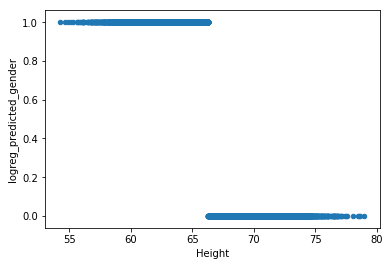

In [109]:
df.plot.scatter(x='Height', y='logreg_predicted_gender')

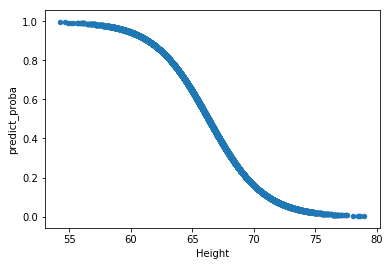

In [118]:
df['predict_proba'] = logistic.predict_proba(df.Height.values.reshape(-1, 1))[:,1]
df.plot.scatter(x='Height', y='predict_proba')

In [119]:
((df.predict_proba - df.Gender) ** 2).mean() ** .5

0.35251195442299227